### Matplotlib Anatomy

This notebook creates the figures showing the anatomy of a matplotlib plot. It is also a good reference showing how to create annotations with callouts and curved arrows.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
    !pip install rioxarray

In [ ]:
import os
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

srtm_tiles = [
  'N27E086.hgt',
  'N27E087.hgt',
  'N28E086.hgt',
  'N28E087.hgt'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/srtm/'

for tile in srtm_tiles:
  url = '{}/{}'.format(data_url, tile)
  download(url)

#### Creating a Figure with Multiple Axes and Frame

In [ ]:
datasets = []
for tile in srtm_tiles:
    path = os.path.join(data_folder, tile)
    rds = rxr.open_rasterio(path)
    band = rds.sel(band=1)
    datasets.append(band)

In [ ]:
fig, axes = plt.subplots(2, 2,edgecolor='black')
fig.set_size_inches(7,7)
for index, ax in enumerate(axes.flat):
    da = datasets[index]
    im = da.plot.imshow(ax=ax, cmap='Greys_r',add_colorbar=False)
    filename = srtm_tiles[index]
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title(filename,fontsize=9)
    ax.set_xlabel('longitude',fontsize = 7)
    ax.set_ylabel('latitude',fontsize = 7)
    ax.set_aspect('equal') # maintain aspect ratio

plt.suptitle('SRTM 30m Elevation Tiles', fontsize=12)

# Add a frame
frame = patches.Rectangle((0, 0), 1, 1,
                          transform=fig.transFigure,
                          edgecolor='black',
                          facecolor='none',
                          linewidth=1.5)
fig.patches.append(frame)

plt.tight_layout()
plt.show()

#### Adding Arrow Annotations

We create a helper function to add labels with curved arrows using [`FancyArrowPatch`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html).

In [ ]:
def add_annotation(fig, title_text, arrow_start_coords, arrow_end_coords):
    """
    Adds a title annotation with an arrow pointing to it on the given figure.

    Parameters:
    - fig: The Matplotlib figure to add the annotation to.
    - title_text: The text of the title annotation.
    - arrow_start_coords: Tuple (x, y) for the starting position
         of the arrow outside the frame in normalized figure coordinates.
    - arrow_end_coords (title_coords): Tuple (x, y) for the end position
         of the arrow in normalized figure coordinates.
    - arrow_color: The color of the arrow.
    """
    arrow_start_x, arrow_start_y = arrow_start_coords
    arrow_end_x, arrow_end_y = arrow_end_coords


    bbox_props = {
        'boxstyle':'round,pad=0.3',
        'edgecolor':'black',
        'facecolor':'white'}
    arrowstyle='-|>'
    arrow_color='blue'
    connectionstyle='arc3,rad=-.2'
    mutation_scale=15
    mutation_aspect=1
    linewidth=1

    # Create and add the arrow
    arrow = patches.FancyArrowPatch(
        (arrow_start_x, arrow_start_y),
        (arrow_end_x, arrow_end_y),
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        color=arrow_color,
        arrowstyle=arrowstyle,
        mutation_scale=mutation_scale,
        mutation_aspect=mutation_aspect,
        linewidth=linewidth
    )
    fig.patches.append(arrow)

    # Add the title annotation with bounding box at the end of the arrow
    fig.text(
        arrow_start_x,
        arrow_start_y,
        title_text,
        ha='center',
        va='center',
        fontsize=12,
        bbox=bbox_props
    )


Create a plot showing different parts of a matplotlib figure.

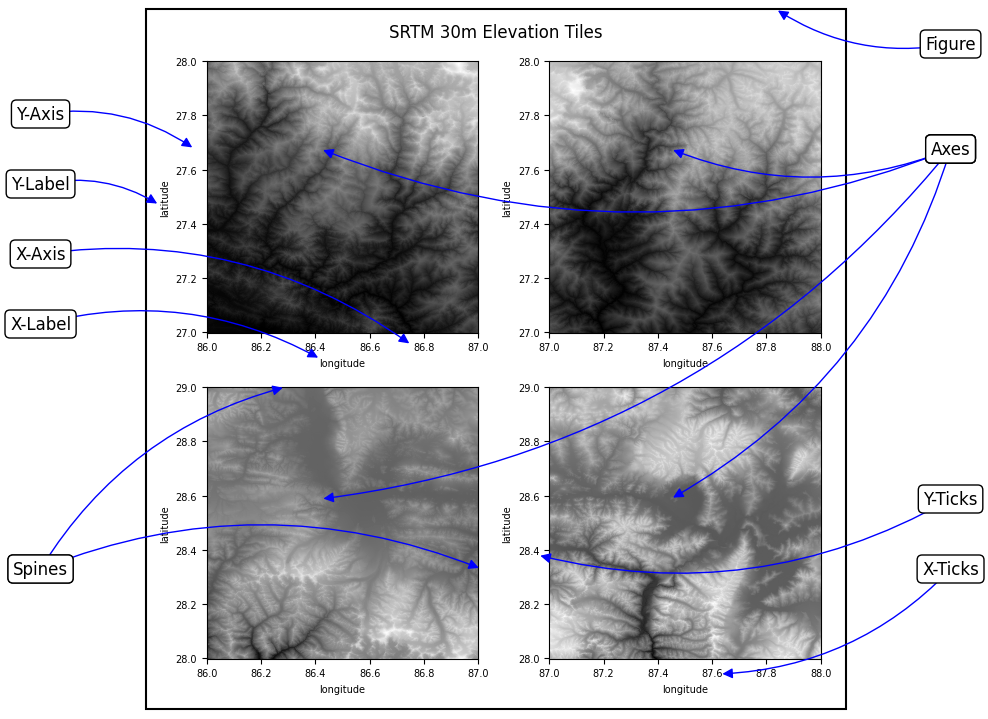

In [49]:
fig, axes = plt.subplots(2, 2,edgecolor='black')
fig.set_size_inches(7, 7)
for index, ax in enumerate(axes.flat):
    da = datasets[index]
    im = da.plot.imshow(ax=ax, cmap='Greys_r',add_colorbar=False)
    filename = srtm_tiles[index]
    ax.margins(0.2)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_title('')
    ax.set_xlabel('longitude',fontsize = 7)
    ax.set_ylabel('latitude',fontsize = 7)
    ax.set_aspect('equal') # maintain aspect ratio

plt.suptitle('SRTM 30m Elevation Tiles', fontsize=12)

# Add a frame
frame = patches.Rectangle((0, 0), 1, 1,
                          transform=fig.transFigure,
                          edgecolor='black',
                          facecolor='none',
                          linewidth=1.5)
fig.patches.append(frame)

output_path = os.path.join(output_folder, 'frame.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Define the titles and arrow positions
# Tile Text, Arrow Start Coords and Arrow End Coords
annotations = [
    ('Figure', (1.15, 0.95), (0.9, 1.0)),
    ('Axes', (1.15, 0.8), (0.75, 0.8)),
    ('Axes', (1.15, 0.8), (0.25, 0.8)),
    ('Axes', (1.15, 0.8), (0.75, 0.3)),
    ('Axes', (1.15, 0.8), (0.25, 0.3)),
    ('Y-Axis', (-0.15, 0.85), (0.07, 0.80)),
    ('X-Axis', (-0.15, 0.65), (0.38, 0.52)),
    ('Y-Label', (-0.15, 0.75), (0.02, 0.72)),
    ('X-Label', (-0.15, 0.55), (0.25, 0.5)),
    ('Y-Ticks', (1.15, 0.3), (0.56, 0.22)),
    ('X-Ticks', (1.15, 0.2), (0.82, 0.05)),
    ('Spines', (-0.15, 0.2), (0.2, 0.46)),
    ('Spines', (-0.15, 0.2), (0.48, 0.2)),
]

# We apply the annotations and also save a series of images
# showing the addition of different elements
for title_text, arrow_start_coords, arrow_end_coords in annotations:
  add_annotation(fig=fig,
               title_text=title_text ,
               arrow_start_coords=arrow_start_coords,
               arrow_end_coords=arrow_end_coords)
  output_path = os.path.join(output_folder, title_text.lower())
  plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()